In [10]:
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import meta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint
import gym

In [2]:
bandit

<module 'infomercial.local_gym.bandit' from '/Users/qualia/Code/infomercial/infomercial/local_gym/bandit.py'>

In [3]:
# environments = [
#     ['BanditOneHot2', 'v0', 1],
#     ['BanditOneHot10', 'v0', 1],
#     ['BanditOneHot121', 'v0', 1],
#     ['BanditOneHot1000', 'v0', 1],
#     ['BanditEvenOdds2', 'v0', 1],
#     ['BanditOneHigh2', 'v0', 1],
#     ['BanditOneHigh10', 'v0', 1],
#     ['BanditOneHigh121', 'v0', 1],
#     ['BanditOneHigh1000', 'v0', 1],
#     ['BanditHardAndSparse2', 'v0', 1],
#     ['BanditHardAndSparse10', 'v0', 1],
#     ['BanditHardAndSparse121', 'v0', 1],
#     ['BanditHardAndSparse1000', 'v0', 1],
#     ['BanditGaussian10', 'v0', 1],
# ]

In [21]:
env_name = 'BanditHardAndSparse1000-v0'
tie_break = 'next' # round robin tie break strategy
tie_threshold = 1e-8  # epsilon in the paper

# Run bandit exps
episodes, actions, scores_E, scores_R, values_E, values_R, ties, policies = meta_bandit(
    env_name=env_name,
    num_episodes=10000, lr=.00001, 
#     num_episodes=10000, lr=.1, 
    tie_threshold=tie_threshold, tie_break=tie_break,
    seed_value=179,
    save="exp_meta_bandit_result.pkl"
)

Best arm: 526, last arm: 931


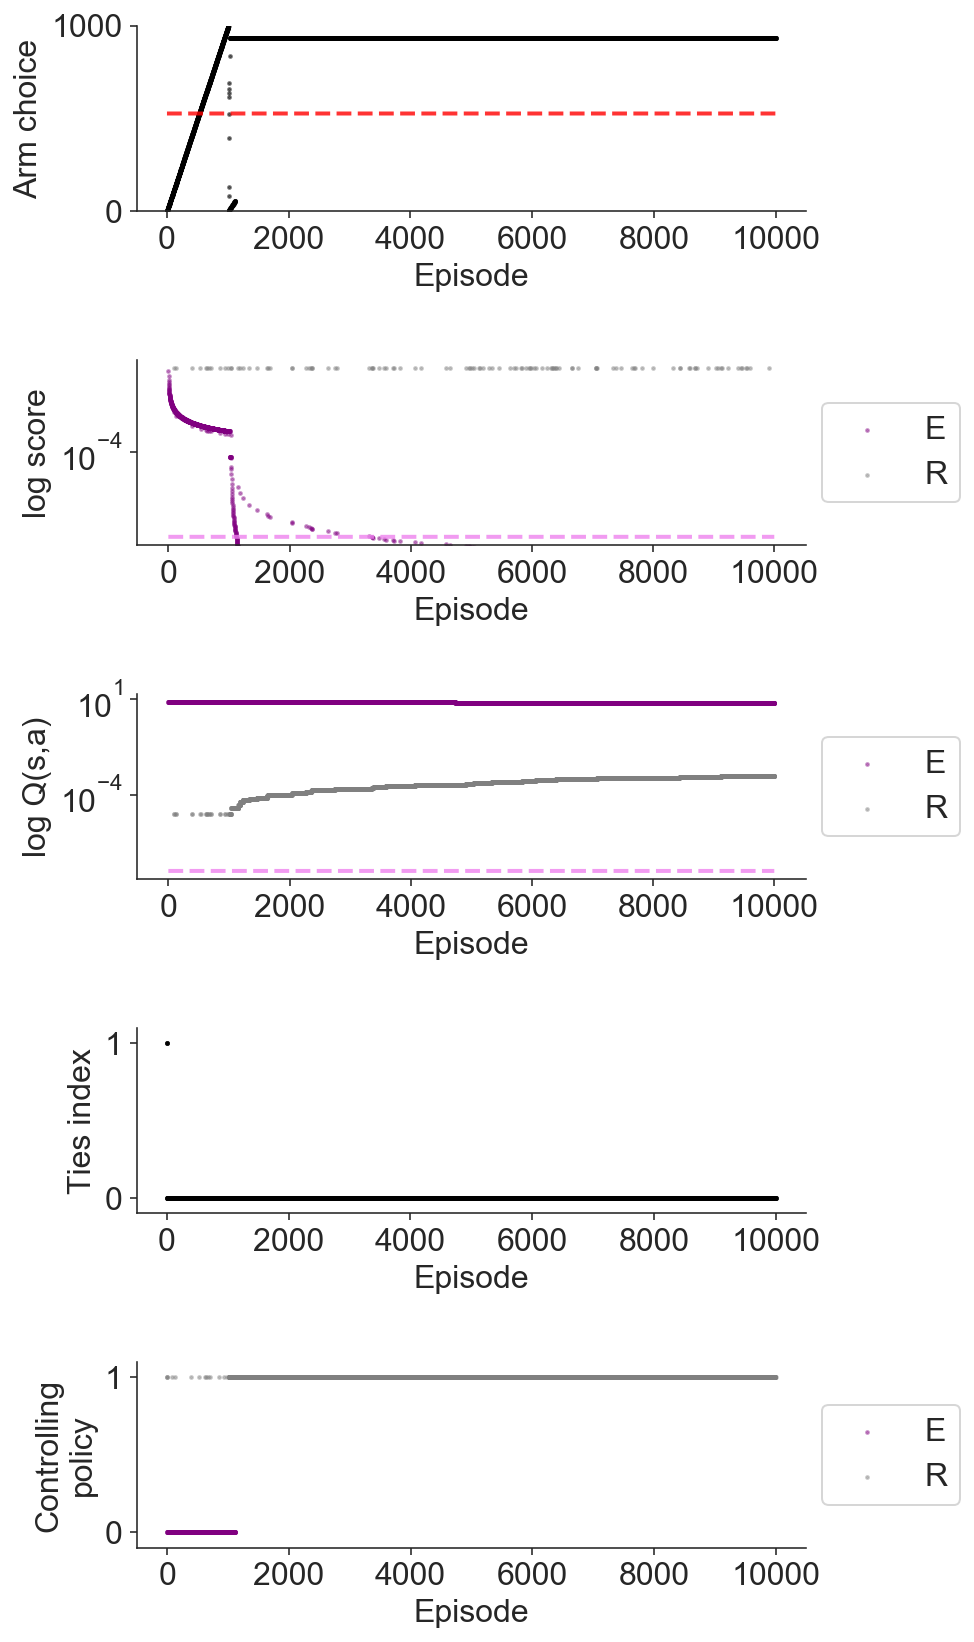

In [22]:
# -
env = gym.make(env_name)
best = env.env.best
print(f"Best arm: {best}, last arm: {actions[-1]}")

# Plotz
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions, color="black", alpha=.5, s=2, label="Bandit")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")

# score
plt.subplot(grid[1, 0])
plt.scatter(episodes, scores_E, color="purple", alpha=0.4, s=2, label="E")
plt.scatter(episodes, scores_R, color="grey", alpha=0.4, s=2, label="R")
plt.plot(episodes, np.repeat(tie_threshold, np.max(episodes)+1), 
         color="violet", alpha=0.8, ls='--', linewidth=2)
plt.ylabel("log score")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[2, 0])
plt.scatter(episodes, values_E, color="purple", alpha=0.4, s=2, label="E")
plt.scatter(episodes, values_R, color="grey", alpha=0.4, s=2, label="R")
plt.plot(episodes, np.repeat(tie_threshold, np.max(episodes)+1), 
         color="violet", alpha=0.8, ls='--', linewidth=2)
plt.ylabel("log Q(s,a)")
plt.xlabel("Episode")
plt.semilogy()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Ties
plt.subplot(grid[3, 0])
plt.scatter(episodes, ties, color="black", alpha=.5, s=2, label="Bandit")
plt.ylim(-.1, 1+.1)
plt.ylabel("Ties index")
plt.xlabel("Episode")

# Policy
policies = np.asarray(policies)
episodes = np.asarray(episodes)
plt.subplot(grid[4, 0])
m = policies == 0
plt.scatter(episodes[m], policies[m], alpha=.4, s=2, label="E", color="purple")
m = policies == 1
plt.scatter(episodes[m], policies[m], alpha=.4, s=2, label="R", color="grey")
plt.ylim(-.1, 1+.1)
plt.ylabel("Controlling\npolicy")
plt.xlabel("Episode")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# -
plt.savefig("figures/meta_bandit.pdf",  bbox_inches='tight')
plt.savefig("figures/meta_bandit.eps",  bbox_inches='tight')

In [11]:
# Test load of saved
result = load_checkpoint("exp_meta_bandit_result.pkl")

In [ ]:
result['critic_E']